In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

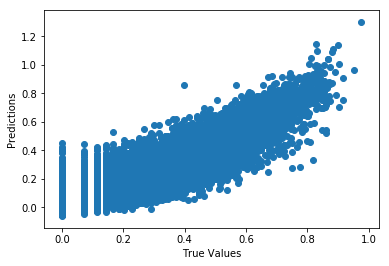

[  3.89281032e-10   7.13963392e-05   4.61411613e-04   1.04674270e-04
  -3.05595641e-04  -7.62005612e-04   8.42628140e-03  -2.70182586e-03
   9.92278475e-03   9.39815979e-03  -7.08503611e-04  -6.16980311e-05
   1.98869782e-04  -2.65256816e-05   6.56199211e-04   5.68523323e-04
  -1.47146249e-04  -2.39119008e-04   9.65206848e-06   5.52454371e-03
  -1.75899751e-03  -3.30956147e-01   2.87617476e-01  -8.73862524e+01
  -1.14354613e+01  -4.58754506e+03   4.67159926e+03   1.65260847e-01
   5.73321753e-01   1.43678855e-04  -1.39833925e-05  -1.85098752e-01
   1.81559427e-01   9.46216041e+01   1.02128244e+00   1.93969261e-01
   1.90134660e-01  -6.80791820e-02  -5.17989843e-03  -6.47091217e-03]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.72897138  0.7305892   0.72305182  0.74019421  0.71855265  0.71753861
  0.74491782  0.72417849  0.72689224  0.75448706]


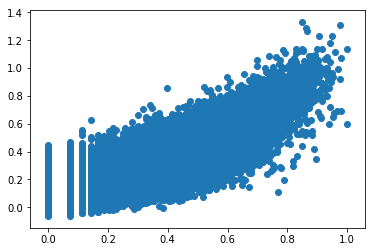

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.731892847189


In [9]:
print(lm.coef_)

[  3.89281032e-10   7.13963392e-05   4.61411613e-04   1.04674270e-04
  -3.05595641e-04  -7.62005612e-04   8.42628140e-03  -2.70182586e-03
   9.92278475e-03   9.39815979e-03  -7.08503611e-04  -6.16980311e-05
   1.98869782e-04  -2.65256816e-05   6.56199211e-04   5.68523323e-04
  -1.47146249e-04  -2.39119008e-04   9.65206848e-06   5.52454371e-03
  -1.75899751e-03  -3.30956147e-01   2.87617476e-01  -8.73862524e+01
  -1.14354613e+01  -4.58754506e+03   4.67159926e+03   1.65260847e-01
   5.73321753e-01   1.43678855e-04  -1.39833925e-05  -1.85098752e-01
   1.81559427e-01   9.46216041e+01   1.02128244e+00   1.93969261e-01
   1.90134660e-01  -6.80791820e-02  -5.17989843e-03  -6.47091217e-03]
